In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, skew

gamma distribution with shape and scale parameter:

like $R_1$: shape = 40, scale = 1/8

check mean should be 5 --> it is: 5.004162692806928


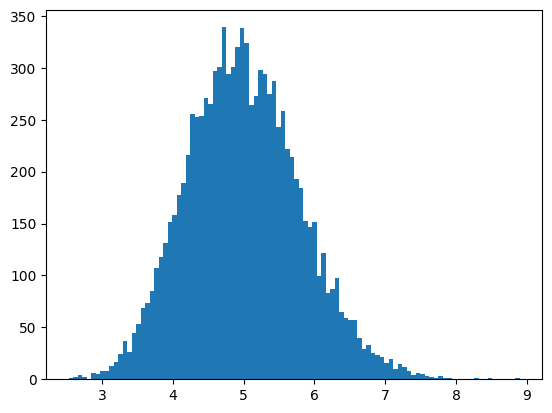

In [2]:
data = gamma.rvs(40, scale=1/8, size=10000);  # generate example data

params = gamma.fit(data)
print(f'check mean should be 5 --> it is: {gamma.mean(*params)}')
plt.hist(data,bins=100);

### Raw Press

Text(0.5, 0, 'vibration level / mm/s')

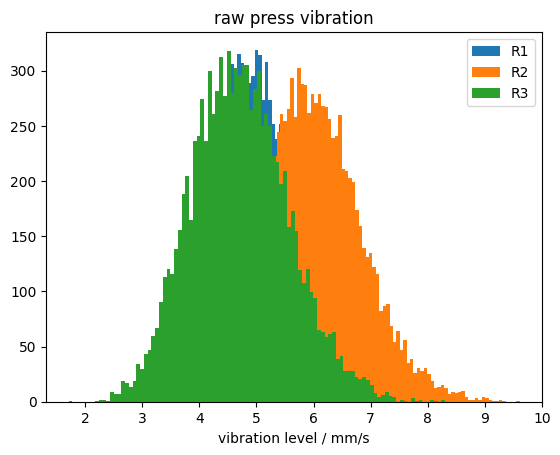

In [3]:
sample_size=10000
R1 = gamma.rvs(40, scale=1/8, size=sample_size)
R2 = gamma.rvs(50, scale=3/25, size=sample_size)
R3 = gamma.rvs(30, scale=47/300, size=sample_size)

plt.hist(R1,bins=100);
plt.hist(R2,bins=100);
plt.hist(R3,bins=100);
plt.legend(['R1','R2','R3'])
plt.title('raw press vibration')
plt.xlabel('vibration level / mm/s')

### dampener

Text(0.5, 0, 'vibration level / mm/s')

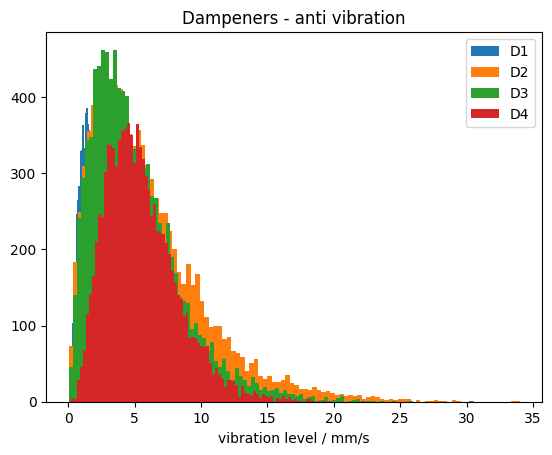

In [4]:
D1 = gamma.rvs(14/5, scale=8/10, size=sample_size)
D2 = gamma.rvs(2, scale=3, size=sample_size)
D3 = gamma.rvs(np.sqrt(5), scale=np.sqrt(5), size=sample_size)
D4 = gamma.rvs(4, scale=11/8, size=sample_size)

plt.hist(D1,bins=100);
plt.hist(D2,bins=100);
plt.hist(D3,bins=100);
plt.hist(D4,bins=100);
plt.legend(['D1','D2','D3','D4'])
plt.title('Dampeners - anti vibration')
plt.xlabel('vibration level / mm/s')

### final system vibration S

In [5]:
def system_vibration(R,D,f):
    return np.sqrt(R**2 + (f*D)**2 - 1.8*f*R*D)

mean: 3.379539181821725
median: 3.2959295760326244
skewness: 0.08287025980918312
skewness (scipy): 0.45420608672444573


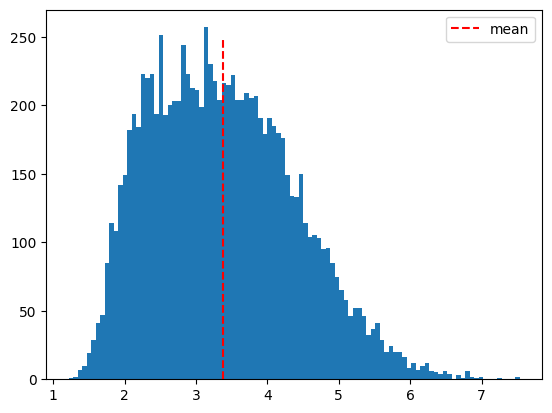

In [6]:
S1=system_vibration(R1,D1,1)
mu = S1.mean()
sigma = np.sqrt(S1.var())
median = np.median(S1)
print(f'mean: {mu}')
print(f'median: {median}')
# skewness according to wikipedia: https://en.wikipedia.org/wiki/Skewness
print(f'skewness: {(mu-median)/sigma}')
print(f'skewness (scipy): {skew(S1)}')
plt.hist(S1,bins=100);
plt.plot([mu,mu],[0, 250],'r--',label='mean')
#plt.plot([median,median],[0, 250],'g--',label='median')
plt.legend()

it seems, scipy defines skewness differently than in Wilipedia (anyhow in Wikipedia they mention that there are different possible notations)

according to scipy: (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)

*"For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution."*

which makes sense if one is looking at the above distribution

mean: 4.79744706431976
median: 4.759618247371234
skewness: 0.046797914013156576
skewness (scipy): 0.29092828691644324


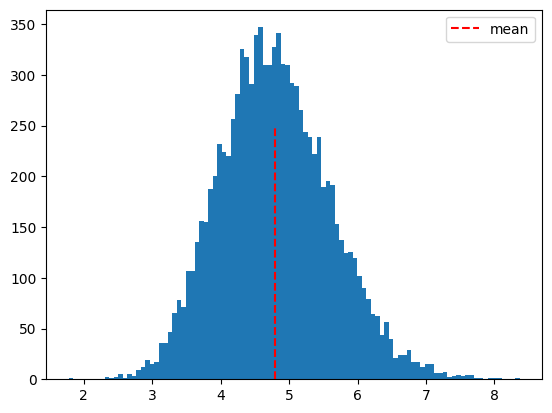

In [7]:
S1=system_vibration(R1,D1,0.1)
mu = S1.mean()
sigma = np.sqrt(S1.var())
median = np.median(S1)
print(f'mean: {mu}')
print(f'median: {median}')
# skewness according to wikipedia: https://en.wikipedia.org/wiki/Skewness
print(f'skewness: {(mu-median)/sigma}')
print(f'skewness (scipy): {skew(S1)}')
plt.hist(S1,bins=100);
plt.plot([mu,mu],[0, 250],'r--',label='mean')
#plt.plot([median,median],[0, 250],'g--',label='median')
plt.legend()

### try out some combinations

In [8]:
def analyze_system_vibration(S):
    print(f'mean: {np.round(S.mean(), 2)}, skewness: {np.round(skew(S), 2)}')
    #plt.hist(system_vibration(R1,D1,1),bins=100);

In [9]:
for ii in range(0,10):
    f=np.round(ii*0.1, 1)
    S=system_vibration(R1,D1,f)
    print(f'for f={f}:')
    analyze_system_vibration(S)


for f=0.0:
mean: 5.0, skewness: 0.31
for f=0.1:
mean: 4.8, skewness: 0.29
for f=0.2:
mean: 4.6, skewness: 0.24
for f=0.3:
mean: 4.41, skewness: 0.18
for f=0.4:
mean: 4.23, skewness: 0.13
for f=0.5:
mean: 4.05, skewness: 0.11
for f=0.6:
mean: 3.89, skewness: 0.14
for f=0.7:
mean: 3.74, skewness: 0.19
for f=0.8:
mean: 3.6, skewness: 0.27
for f=0.9:
mean: 3.48, skewness: 0.36


now use D2 instead

In [10]:
for ii in range(0,10):
    f=np.round(ii*0.1, 1)
    S=system_vibration(R1,D2,f)
    print(f'for f={f}:')
    analyze_system_vibration(S)

for f=0.0:
mean: 5.0, skewness: 0.31
for f=0.1:
mean: 4.47, skewness: 0.17
for f=0.2:
mean: 4.01, skewness: 0.08
for f=0.3:
mean: 3.64, skewness: 0.26
for f=0.4:
mean: 3.42, skewness: 0.51
for f=0.5:
mean: 3.32, skewness: 1.12
for f=0.6:
mean: 3.34, skewness: 2.07
for f=0.7:
mean: 3.45, skewness: 2.72
for f=0.8:
mean: 3.64, skewness: 2.92
for f=0.9:
mean: 3.89, skewness: 2.89
